# Cleaning Notebook

### Objective
Determine whether it would be feasible to create an application that can estimate accurately estimate the <b>Nutriscore Grade</b> and <b>NOVA Score</b> of products based on minimal input from the user.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Open dataset
data = pd.read_csv('en.openfoodfacts.org.products.csv', sep = "\t", low_memory = False)

In [3]:
#Set Environment
pd.set_option('display.max_columns', 180)
pd.set_option('display.max_rows', 50)

In [4]:
#Check what the data looks like
data.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,1569.0,1569.0,NaN,7.0,3.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.1,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.8,NaN,NaN,NaN,1.40,0.560000,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
data.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutriscore_score,nova_group,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.131131e+06,1.131131e+06,0.0,0.0,2.851460e+05,0.0,463804.000000,463804.000000,0.0,463804.000000,0.0,321402.000000,339938.000000,9.014300e+04,8.236870e+05,8.989760e+05,960.000000,892904.000000,862823.000000,1.0,0.0,1.0,4.000000,8.000000,1.0,3.000000,1.0,2.000000,1.0000,0.0,3.000000,2.000000,0.0,24550.000000,24603.000000,1635.000000,302.000000,99.000000,135.000000,383.000000,201.000000,16.000000,4.000000,1.00,43.000000,21.000000,0.0,0.0,0.0,0.0,0.0,144438.000000,145268.000000,892829.000000,878525.000000,120.000000,54.000000,73.000000,501.000000,9.000000,16.000000,396.000000,825.000000,308966.000000,894509.000000,40.000000,36.000000,13.000000,883468.000000,883418.000000,13650.000000,139251.000000,71.000000,8622.000000,2626.000000,1037.000000,142818.000000,12468.000000,11952.000000,12755.000000,8029.000000,6113.000000,3091.000000,6.476000e+03,607.000000,3097.000000,101.000000,317.000000,26390.000000,574.000000,146717.000000,6805.000000,143031.000000,7928.000000,4624.000000,2315.000000,1892.000000,2.620000e+02,1350.000000,6.400000e+01,66.000000,636.000000,272.000000,111.000000,148.000000,5821.000000,282.000000,10606.000000,289.000000,4800.000000,2.000000,410.000000,9669.000000,321409.000000,321409.000000,3.000000,0.0,37.000000,6.000000,22.000000,39.000000,17.000000
mean,1.524457e+09,1.547542e+09,NaN,NaN,3.896639e+16,NaN,1.623242,0.026897,NaN,0.071660,NaN,9.209684,3.555813,7.394428e+37,1.174267e+03,7.414613e+36,543.354469,14.189945,5.315376,0.0,NaN,7.4,3.225000,36.068091,18.9,2.702393,3.0,0.032000,0.0015,NaN,1.333333,31.000000,NaN,11.085732,6.572384,4.290271,2.349832,1.636703,0.474016,14.210857,3.831672,0.055131,0.373750,4.77,36.359430,27.638033,NaN,NaN,NaN,NaN,NaN,0.073784,0.031147,28.328572,13.967045,13.571583,8.349259,26.792055,4.391891,11.822222,11.800500,28.958662,47.752753,3.045983,

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131131 entries, 0 to 1131130
Columns: 178 entries, code to carnitine_100g
dtypes: float64(120), int64(2), object(56)
memory usage: 1.5+ GB


### Evaluate Data Completeness per column to determine which Variables can be investigated

In [7]:
#Make a data frame to show missing data per column
null_columns = pd.DataFrame(100-((data.isnull().sum()/len(data))*100))
null_columns.columns = ['Completeness']

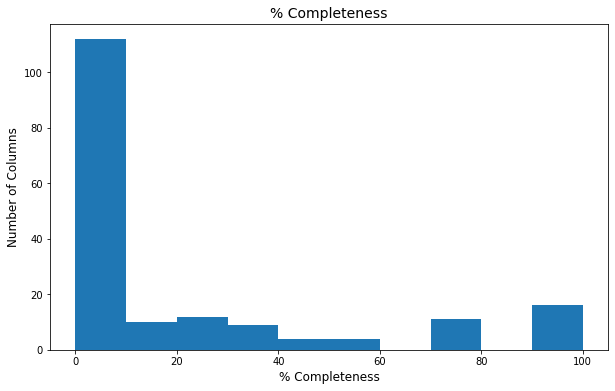

In [8]:
#Histogram to show spread of completeness of data
null_columns.hist(bins = 10)
plt.grid(b = None)
plt.ylabel('Number of Columns', fontsize = 12)
plt.xlabel('% Completeness', fontsize = 12)
plt.title('% Completeness', fontsize = 14)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.rc('font', size = 12)
plt.show()

A large number of columns are completed between 0-10%, this means we will have to drop a lot of data

In [9]:
#Sorting the data for amount of non-null values per column
filled_columns = data.count().sort_values(ascending = True)

In [10]:
fill2 = (filled_columns / len(data))*100

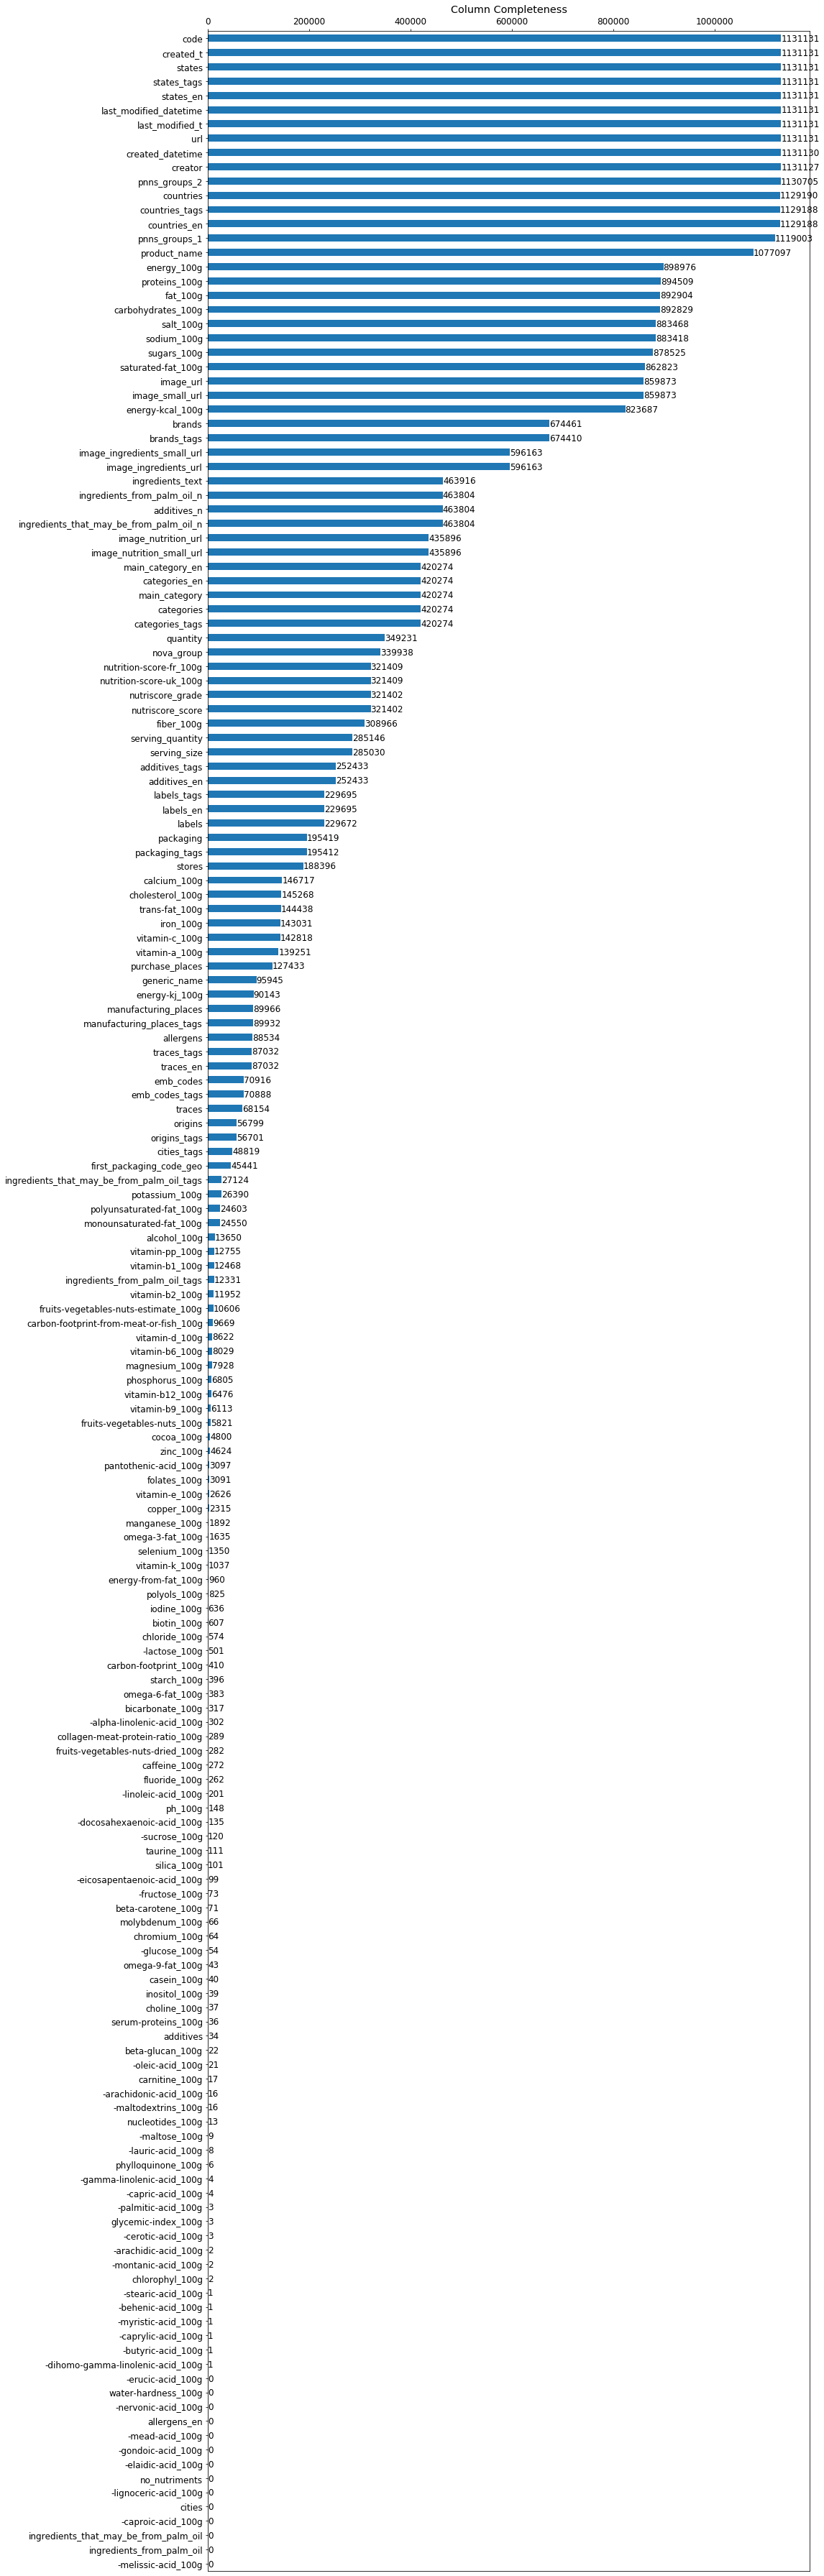

In [11]:
#Generating graph to see number of non-null values per column
fig, ax = plt.subplots(figsize=(15,65))
filled_columns.plot.barh()
ax.set_title('Column Completeness')
ax.xaxis.tick_top()
for i, v in enumerate(filled_columns):
    ax.text(v + 3, i - 0.2, str(v))

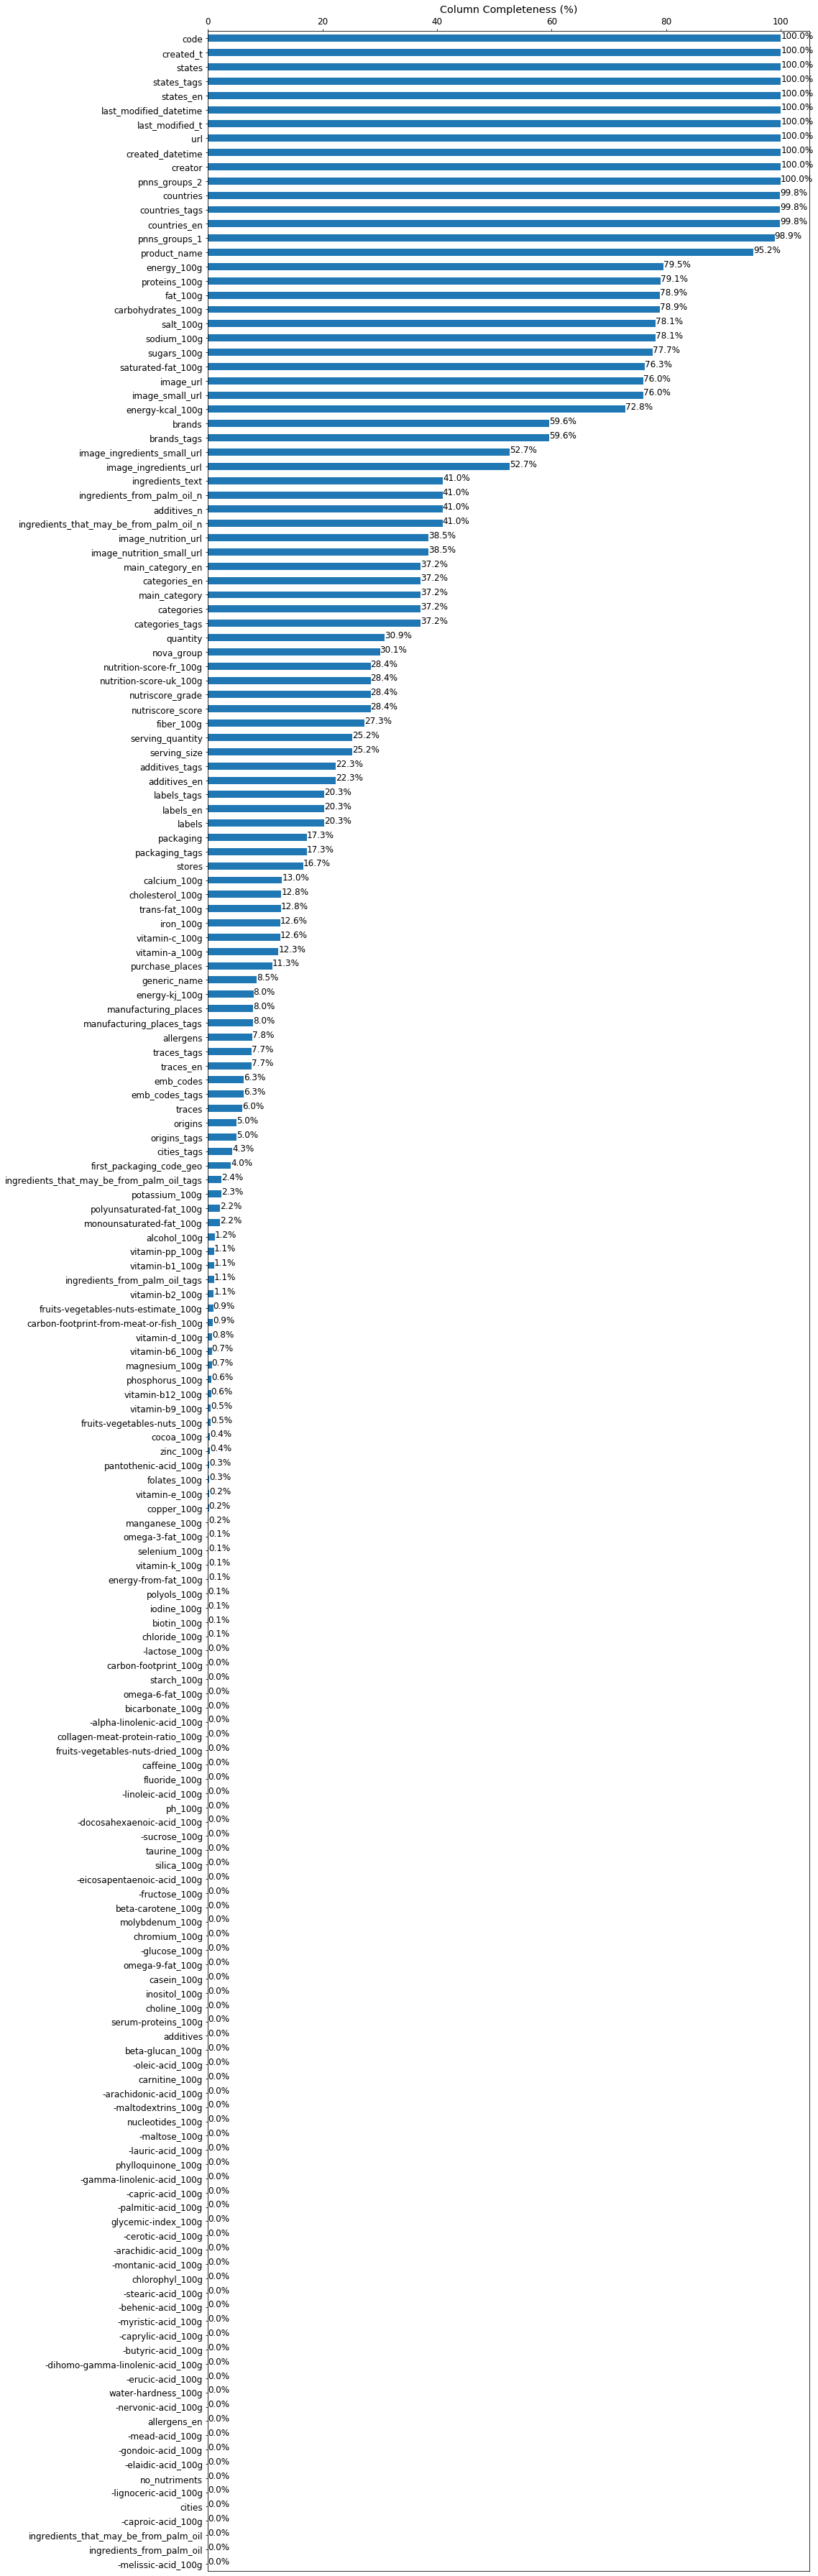

In [12]:
#Generating graph to see number of non-null values per column in %
fig, ax = plt.subplots(figsize=(15,65))
fill2.plot.barh()
ax.set_title('Column Completeness (%)')
ax.xaxis.tick_top()
for i, v in enumerate(fill2):
    ax.text(v, i, str(round(v,1)) + '%')

Visually, we can see that there is a long tail of columns populated at less than 4%. No critical columns for our analysis are found in these columns. We can opt to remove these.

## Cleanup 1: Insufficiently Populated Columns

Remove all columns with less than 4% complete data (<45,000 rows)

In [13]:
filled_columns = filled_columns.to_frame()

In [14]:
#Make a list of columns that have less than 4% of data
threshold = len(data)*0.04
filled_columns.columns = ['Non Null Values']
drop_cols = filled_columns[filled_columns['Non Null Values']< threshold].index.tolist()

In [15]:
#Check which columns are getting dropped
drop_cols

['-melissic-acid_100g',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 '-caproic-acid_100g',
 'cities',
 '-lignoceric-acid_100g',
 'no_nutriments',
 '-elaidic-acid_100g',
 '-gondoic-acid_100g',
 '-mead-acid_100g',
 'allergens_en',
 '-nervonic-acid_100g',
 'water-hardness_100g',
 '-erucic-acid_100g',
 '-dihomo-gamma-linolenic-acid_100g',
 '-butyric-acid_100g',
 '-caprylic-acid_100g',
 '-myristic-acid_100g',
 '-behenic-acid_100g',
 '-stearic-acid_100g',
 'chlorophyl_100g',
 '-montanic-acid_100g',
 '-arachidic-acid_100g',
 '-cerotic-acid_100g',
 'glycemic-index_100g',
 '-palmitic-acid_100g',
 '-capric-acid_100g',
 '-gamma-linolenic-acid_100g',
 'phylloquinone_100g',
 '-lauric-acid_100g',
 '-maltose_100g',
 'nucleotides_100g',
 '-maltodextrins_100g',
 '-arachidonic-acid_100g',
 'carnitine_100g',
 '-oleic-acid_100g',
 'beta-glucan_100g',
 'additives',
 'serum-proteins_100g',
 'choline_100g',
 'inositol_100g',
 'casein_100g',
 'omega-9-fat_100g',
 '-glucose_100g',
 

In [16]:
len(drop_cols)

98

In [17]:
#Drop the data
data_clean = data.drop(columns = drop_cols)

In this step we have removed <b>98 columns</b> that were not necessary in our dataset

## Cleanup 2: Redundant & Unnecessary Columns

In [18]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131131 entries, 0 to 1131130
Data columns (total 80 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   code                                     1131131 non-null  object 
 1   url                                      1131131 non-null  object 
 2   creator                                  1131127 non-null  object 
 3   created_t                                1131131 non-null  int64  
 4   created_datetime                         1131130 non-null  object 
 5   last_modified_t                          1131131 non-null  int64  
 6   last_modified_datetime                   1131131 non-null  object 
 7   product_name                             1077097 non-null  object 
 8   generic_name                             95945 non-null    object 
 9   quantity                                 349231 non-null   object 
 10  packaging         

In [19]:
#Create a function to check whether columns are indeed the same
def compare_columns(df, cols, sample=10):
    comp_df = pd.DataFrame(columns=cols)
    for col in cols:
        comp_df = pd.concat((comp_df, df[~df[col].isna()][cols].sample(sample)))
        records = data_clean[col].count()
        print(f"Column '{col}' contains: {records} records")
    display(comp_df)

In [20]:
#Create a function to replace null values from one column by the values from another column
def fill_in_na(df, col1, col2):
    if df[col1].count() > df[col2].count():
        df[col1].fillna(df[col2], inplace = True)
    else:
        df[col2].fillna(df[col1], inplace = True)

In [21]:
#Create a function to remove the smaller one of the two columns
def remove_smaller_column(df, col1, col2):
    if df[col1].count() > df[col2].count():
        df.drop(columns = col2, inplace = True)
    elif df[col1].count() == df[col2].count():
        df.drop(columns = col2, inplace = True)
    else:
        df.drop(columns = col1, inplace = True)

Based on the above, we want to investigate the following columns for similarity:
1. categories to categories_tags
2. categories to categories_tags: 80%
3. categories to categories_en: 87%
4. manufacturing_places to manufacturing_places_tags: 89%
5. labels to labels_en: 80%
6. countries to countries_en: 86%
7. traces to traces_en: 80%
8. additives_n to additives_tags: 80%
9. additives_n to additives_en: 96%
10. ingredients_from_palm_oil_n to ingredients_that_may_be_from_palm_oil_n: 82%
11. states to states_en: 80%
12. main_category to main_category_en: 90%
13. energy-kj_100g to energy_100g: 88%
14. nutrition-score-fr_100g to nutrition-score-uk_100g: 91%

#### Brands

In [22]:
compare_columns(data_clean, ['brands', 'brands_tags'])

Column 'brands' contains: 674461 records
Column 'brands_tags' contains: 674410 records


,brands,brands_tags
738255,Destan,destan
507016,"Monoprix Gourmet,Monoprix","monoprix-gourmet,monoprix"
1082580,Lay's,lay-s
273211,Caffeciao,caffeciao
160873,Maître Coq,maitre-coq
567320,Miels Villeneuve,miels-villeneuve
764007,Waitrose,waitrose
927126,"Nutella, Ferrero","nutella,ferrero"
209534,Lowes Foods,lowes-foods
1081837,Clover Valley,clover-valley


In [23]:
#Removing smaller one of the two
remove_smaller_column(data_clean, 'brands', 'brands_tags')

#### Energy

In [24]:
compare_columns(data_clean, ['energy_100g', 'energy-kj_100g'])

Column 'energy_100g' contains: 898976 records
Column 'energy-kj_100g' contains: 90143 records


,energy_100g,energy-kj_100g
753906,1457.0,1457.0
542134,188.0,NaN
1010836,201.0,NaN
749614,1048.0,1048.0
848093,1477.0,NaN
379031,1650.0,NaN
1022500,75.0,NaN
101276,326.0,NaN
449410,682.0,NaN
167148,435.0,NaN


In [25]:
fill_in_na(data_clean, 'energy_100g', 'energy-kj_100g')

In [26]:
remove_smaller_column(data_clean, 'energy_100g', 'energy-kj_100g')

#### Packaging

In [27]:
compare_columns(data_clean, ['packaging', 'packaging_tags'])

Column 'packaging' contains: 195419 records
Column 'packaging_tags' contains: 195412 records


,packaging,packaging_tags
484919,"carton,plastique,surgelé","carton,plastique,surgele"
1001786,bouteille,bouteille
935447,"bocal,verre","bocal,verre"
1061471,plástico,plastico
572685,Sachet plastique,sachet-plastique
514175,"plastique,film,barquette,barquette et film pla...","plastique,film,barquette,barquette-et-film-pla..."
396077,"Carton,Plastique","carton,plastique"
1036610,pot plastique,pot-plastique
1113808,plastic bottle,plastic-bottle
263346,frais,frais


In [28]:
remove_smaller_column(data_clean, 'packaging', 'packaging_tags')

#### Categories

In [29]:
compare_columns(data_clean, ['categories_en', 'categories_tags'])

Column 'categories_en' contains: 420274 records
Column 'categories_tags' contains: 420274 records


,categories_en,categories_tags
120310,"Plant-based foods and beverages,Plant-based fo...","en:plant-based-foods-and-beverages,en:plant-ba..."
806948,Beverages,en:beverages
18522,"Biscuits and cakes,Pastries,Coconut Macaroons","en:biscuits-and-cakes,en:pastries,en:coconut-m..."
537138,"Snacks,Sweet snacks,Biscuits and cakes,Biscuit...","en:snacks,en:sweet-snacks,en:biscuits-and-cake..."
427825,"Meats,Prepared meats,fr:Charcuteries à cuire","en:meats,en:prepared-meats,fr:charcuteries-a-c..."
517616,"Meats,Beef,Beef preparations,Dried meats,Meat ...","en:meats,en:beef,en:beef-preparations,en:dried..."
958742,"Groceries,Sauces,Pestos","en:groceries,en:sauces,en:pestos"
974451,"Dairies,Fermented foods,Fermented milk product...","en:dairies,en:fermented-foods,en:fermented-mil..."
261572,"Dairies,Fermented foods,Fermented milk product...","en:dairies,en:fermented-foods,en:fermented-mil..."
792604,"Snacks,Salty snacks,Appetizers,Crackers,Pretzel","en:snacks,en:salty-snacks,en:appetizers,en:cra..."


In [30]:
remove_smaller_column(data_clean, 'categories_en', 'categories_tags')

#### Origins

In [31]:
compare_columns(data_clean, ['origins', 'origins_tags'])

Column 'origins' contains: 56799 records
Column 'origins_tags' contains: 56701 records


,origins,origins_tags
374783,Vittel,vittel
530529,Union européenne,union-europeenne
372172,France,france
269975,"acide,gras saturé glucide protéine sucre,99%d'eau","acide,gras-sature-glucide-proteine-sucre,99-d-eau"
558540,France,france
851291,Romania,romania
647050,"Haute-Savoie,Rhône-Alpes,France,Agriculture Fr...","haute-savoie,rhone-alpes,france,agriculture-fr..."
718570,Republik Moldau,republik-moldau
886056,Suisse,suisse
408206,UE / non UE,ue-non-ue


In [32]:
remove_smaller_column(data_clean, 'origins', 'origins_tags')

#### Manufacturing Places

In [33]:
compare_columns(data_clean, ['manufacturing_places', 'manufacturing_places_tags'])

Column 'manufacturing_places' contains: 89966 records
Column 'manufacturing_places_tags' contains: 89932 records


,manufacturing_places,manufacturing_places_tags
1122016,China,china
392250,France,france
431272,France,france
493124,"Franche-Comté,France","franche-comte,france"
745840,Saarbrücken,saarbrucken
571714,"France,Fontenay-le-Comte,Vendée","france,fontenay-le-comte,vendee"
468257,"France,Finistère,Bretagne","france,finistere,bretagne"
865194,Finland,finland
45489,Canada,canada
457886,France,france


In [34]:
remove_smaller_column(data_clean, 'manufacturing_places', 'manufacturing_places_tags')

#### Labels

In [35]:
#Filling out labels_en as it contains more values and contains some French values anyway
fill_in_na(data_clean, 'labels', 'labels_en')

In [36]:
#Choosing to only keep the traces_en column because other columns contain less values or the same values as tags
data_clean.drop(columns=["labels"], inplace = True)
data_clean.drop(columns=["labels_tags"], inplace = True)

#### Emb Codes

In [37]:
compare_columns(data_clean, ['emb_codes', 'emb_codes_tags'])

Column 'emb_codes' contains: 70916 records
Column 'emb_codes_tags' contains: 70888 records


,emb_codes,emb_codes_tags
528161,FR 86.247.001 EC,fr-86-247-001-ec
366421,FR 59.165.030 EC,fr-59-165-030-ec
607883,FR 44.131.008 EC,fr-44-131-008-ec
371726,FR 76.240.003 EC,fr-76-240-003-ec
617992,BE M362 EC,be-m362-ec
936060,IT 03 74 EC,it-03-74-ec
418060,EMB 73045A,emb-73045a
470587,EMB 35068G,emb-35068g
458649,EMB 76377,emb-76377
730888,DE BW 077 EC,de-bw-077-ec


In [38]:
remove_smaller_column(data_clean, 'emb_codes', 'emb_codes_tags')

#### Countries

In [39]:
compare_columns(data_clean, ['countries_en', 'countries'])

Column 'countries_en' contains: 1129188 records
Column 'countries' contains: 1129190 records


,countries_en,countries
424284,France,France
631997,Spain,en:es
746455,Netherlands,Netherlands
976875,Spain,en:es
168059,France,France
935131,Belgium,en:BE
363961,Germany,en:Germany
613274,France,France
918287,France,en:FR
467404,France,en:France


In [40]:
#Choosing to only keep the countries_en column because other columns contain the countries written in their origin language which sometimes isn't in the Latin Alphabet
data_clean.drop(columns=["countries"], inplace = True)
data_clean.drop(columns=["countries_tags"], inplace = True)

#### Traces

In [41]:
compare_columns(data_clean, ['traces', 'traces_en'])

Column 'traces' contains: 68154 records
Column 'traces_en' contains: 87032 records


,traces,traces_en
150141,en:milk,Milk
950033,"en:eggs,en:nuts,en:peanuts,it:puo-contenere-tr...","Eggs,Nuts,Peanuts,it:puo-contenere-tracce-di-c..."
33217,"Gluten,Milk,Soybeans","Gluten,Milk,Soybeans"
1065590,"en:milk,en:nuts,en:peanuts,en:soybeans","Milk,Nuts,Peanuts,Soybeans"
262926,en:nuts,Nuts
835014,"en:eggs,en:gluten,en:milk,en:soybeans","Eggs,Gluten,Milk,Soybeans"
203602,"Eggs,Soybeans,Noix de Grenoble,Peut contenir d...","Eggs,Soybeans,fr:noisettes-et-sesame,fr:noix-d..."
434227,en:nuts,"Nuts,Sesame seeds"
257203,Fruits à coque,Nuts
443968,en:molluscs,Molluscs


In [42]:
#Filling in values as traces_en already contains a mixture of French and English anyway
fill_in_na(data_clean, 'traces', 'traces_en')

In [43]:
#Choosing to only keep the traces_en column because other columns contain less values or the same values as tags
data_clean.drop(columns=["traces"], inplace = True)
data_clean.drop(columns=["traces_tags"], inplace = True)

#### Additives

In [44]:
compare_columns(data_clean, ['additives_tags', 'additives_en'])

Column 'additives_tags' contains: 252433 records
Column 'additives_en' contains: 252433 records


,additives_tags,additives_en
520421,"en:e270,en:e330","E270 - Lactic acid,E330 - Citric acid"
187893,"en:e322,en:e322i","E322 - Lecithins,E322i - Lecithin"
615237,"en:e1105,en:e250,en:e251,en:e322,en:e420,en:e422","E1105 - Lysozyme,E250 - Sodium nitrite,E251 - ..."
10531,"en:e410,en:e415","E410 - Locust bean gum,E415 - Xanthan gum"
119735,"en:e212,en:e330,en:e950,en:e951","E212 - Potassium benzoate,E330 - Citric acid,E..."
810059,en:e322,E322 - Lecithins
57887,en:e129,E129 - Allura red ac
96520,"en:e102,en:e127,en:e133,en:e903","E102 - Tartrazine,E127 - Erythrosine,E133 - Br..."
63681,en:e220,E220 - Sulphur dioxide
954685,"en:e160,en:e202,en:e322,en:e322i,en:e330,en:e4...","E160 - Carotenoids,E202 - Potassium sorbate,E3..."


In [45]:
#Removing tags as it contains less info than additives_en, doesn't have the actual name of the additives.
#Keeping additives_n as this is the number of additives per product
data_clean.drop(columns = ['additives_tags'], inplace = True)

#### Nutriscore Score and Nutriscore Grade

In [46]:
compare_columns(data_clean, ['nutriscore_score', 'nutriscore_grade'])

Column 'nutriscore_score' contains: 321402 records
Column 'nutriscore_grade' contains: 321402 records


,nutriscore_score,nutriscore_grade
371882,12.0,d
757710,0.0,b
573735,1.0,b
993092,13.0,d
906947,24.0,e
668529,2.0,b
407663,0.0,b
382697,3.0,c
521206,2.0,b
412554,12.0,d


#### States

In [47]:
#Only states_en is worth keeping, states and states_tags are duplicates
compare_columns(data_clean, ['states_tags', 'states'])

Column 'states_tags' contains: 1131131 records
Column 'states' contains: 1131131 records


,states_tags,states
994425,"en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet..."
248066,"en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet..."
716863,"en:to-be-checked,en:complete,en:nutrition-fact...","en:to-be-checked, en:complete, en:nutrition-fa..."
746034,"en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet..."
1023671,"en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet..."
520102,"en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet..."
829965,"en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet..."
172161,"en:to-be-completed,en:nutrition-facts-to-be-co...","en:to-be-completed, en:nutrition-facts-to-be-c..."
263363,"en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet..."
337795,"en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet..."


In [48]:
data_clean.drop(columns = ['states'], inplace = True)
data_clean.drop(columns = ['states_tags'], inplace = True)

#### Main Category

In [49]:
compare_columns(data_clean, ['main_category', 'main_category_en'])

Column 'main_category' contains: 420274 records
Column 'main_category_en' contains: 420274 records


,main_category,main_category_en
1024564,en:fruit-juices,Fruit juices
140904,en:plant-based-foods-and-beverages,Plant-based foods and beverages
607177,en:sweeteners,Sweeteners
576314,en:meats,Meats
1065698,en:plant-based-foods-and-beverages,Plant-based foods and beverages
511354,en:snacks,Snacks
44175,en:dairies,Dairies
407035,en:meals,Meals
640331,fr:fromages-a-pate-molle,fr:fromages-a-pate-molle
894438,en:meats,Meats


In [50]:
#Removing main_category
data_clean.drop(columns = ['main_category'], inplace = True)

#### Image Columns

In [51]:
#No use for image URLs so going to remove these
img_cols = [i for i in data_clean.columns if 'image' in i] 

In [52]:
for i in img_cols:
    data_clean.drop(columns = [i], inplace = True)

#### Nutriscore

In [53]:
compare_columns(data_clean, ['nutriscore_score', 'nutrition-score-fr_100g'])

Column 'nutriscore_score' contains: 321402 records
Column 'nutrition-score-fr_100g' contains: 321409 records


,nutriscore_score,nutrition-score-fr_100g
977547,22.0,22.0
330849,13.0,13.0
409953,20.0,20.0
903019,3.0,3.0
491904,5.0,5.0
450010,23.0,23.0
443190,11.0,11.0
423821,-2.0,-2.0
581588,-1.0,-1.0
430980,15.0,15.0


In [54]:
#These seem to be exactly the same, let's fill out the largest column of the two to get as many values as possible
fill_in_na(data_clean, 'nutriscore_score', 'nutrition-score-fr_100g')

In [55]:
remove_smaller_column(data_clean, 'nutriscore_score', 'nutrition-score-fr_100g')

In [56]:
compare_columns(data_clean, ['nutrition-score-uk_100g', 'nutrition-score-fr_100g'])

Column 'nutrition-score-uk_100g' contains: 321409 records
Column 'nutrition-score-fr_100g' contains: 321411 records


,nutrition-score-uk_100g,nutrition-score-fr_100g
699555,1.0,9.0
587122,18.0,18.0
249924,23.0,23.0
531616,2.0,2.0
446342,19.0,19.0
528738,2.0,2.0
915735,-4.0,2.0
84654,15.0,15.0
531915,16.0,16.0
488873,10.0,10.0


In [57]:
#These also seem to be mostly the same, let's fill out the largest column of the two to get as many values as possible
fill_in_na(data_clean, 'nutrition-score-uk_100g', 'nutrition-score-fr_100g')

In [58]:
remove_smaller_column(data_clean, 'nutrition-score-uk_100g', 'nutrition-score-fr_100g')

#### Product Name

In [59]:
compare_columns(data_clean, ['product_name','generic_name'])

Column 'product_name' contains: 1077097 records
Column 'generic_name' contains: 95945 records


,product_name,generic_name
762752,Twix Sticks 10er,NaN
647897,Orangettes,NaN
974136,Turrón de &quot;cheesecake&quot;,NaN
361274,Figue,NaN
585205,Sauce barbecue - flacon,NaN
435191,Confiture abricot allégé en sucre,NaN
388230,Rosé,NaN
821574,10 Gaufres Fourrées à la Vergeoise,NaN
685983,All in a glass,NaN
732405,Gemuse Pfanne Provence,NaN


In [60]:
fill_in_na(data_clean, 'product_name', 'generic_name')
remove_smaller_column(data_clean, 'product_name', 'generic_name')

#### Categories

In [61]:
compare_columns(data_clean, ['categories','categories_en'])

Column 'categories' contains: 420274 records
Column 'categories_en' contains: 420274 records


,categories,categories_en
550888,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","Snacks,Sweet snacks,Biscuits and cakes,Biscuit..."
275852,"Przekąski, Słodkie przekąski, Confectioneries,...","Snacks,Sweet snacks,Confectioneries,Chocolate ..."
428673,"Tartes, Tartelettes, Tartelettes au chocolat","Pies,Tartlets,Chocolate tartlets"
486304,"Snacks, Desserts, Snacks sucrés, Biscuits et g...","Snacks,Desserts,Sweet snacks,Biscuits and cake..."
380145,"Növényi alapú élelmiszerek és italok, Növényia...","Plant-based foods and beverages,Plant-based fo..."
1007069,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","Snacks,Sweet snacks,Biscuits and cakes,Biscuits"
519891,"Aliments et boissons à base de végétaux, Alime...","Plant-based foods and beverages,Plant-based fo..."
942820,"Epicerie, Sauces, Sauces Pesto","Groceries,Sauces,Pestos"
1097624,"Beverages,Artificially sweetened beverages","Beverages,Artificially sweetened beverages"
407859,"Snacks, Snacks salés, Apéritif, Biscuits apéri...","Snacks,Salty snacks,Appetizers,Crackers"


In [62]:
#Removing categories as it seems to have data in other languages which might be difficult to query
data_clean.drop(columns = ['categories'], inplace = True)

#### Palm Oil

In [63]:
compare_columns(data_clean, ['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n'])

Column 'ingredients_from_palm_oil_n' contains: 463804 records
Column 'ingredients_that_may_be_from_palm_oil_n' contains: 463804 records


,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
596742,0.0,0.0
461263,0.0,0.0
672596,0.0,0.0
77968,0.0,0.0
224255,0.0,0.0
814543,0.0,0.0
256033,0.0,0.0
873373,0.0,0.0
419949,0.0,0.0
248889,0.0,0.0


These don't seem to be exactly the same, will maintain both to be sure

In [64]:
#Test for remaining columns that have similar names that we may have missed
from fuzzywuzzy import fuzz
for i in data_clean.columns:
    for j in data_clean.columns:
        match = fuzz.ratio(i, j)
        if match >=80 and match !=100:
            print(f'{i} to {j}: {match}%')

last_modified_t to last_modified_datetime: 81%
last_modified_datetime to last_modified_t: 81%
additives_n to additives_en: 96%
additives_en to additives_n: 96%
ingredients_from_palm_oil_n to ingredients_that_may_be_from_palm_oil_n: 82%
ingredients_that_may_be_from_palm_oil_n to ingredients_from_palm_oil_n: 82%
pnns_groups_1 to pnns_groups_2: 92%
pnns_groups_2 to pnns_groups_1: 92%
energy-kcal_100g to energy_100g: 81%
energy_100g to energy-kcal_100g: 81%
fat_100g to salt_100g: 82%
salt_100g to fat_100g: 82%
vitamin-a_100g to vitamin-c_100g: 93%
vitamin-c_100g to vitamin-a_100g: 93%


In [65]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131131 entries, 0 to 1131130
Data columns (total 53 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   code                                     1131131 non-null  object 
 1   url                                      1131131 non-null  object 
 2   creator                                  1131127 non-null  object 
 3   created_t                                1131131 non-null  int64  
 4   created_datetime                         1131130 non-null  object 
 5   last_modified_t                          1131131 non-null  int64  
 6   last_modified_datetime                   1131131 non-null  object 
 7   product_name                             1077247 non-null  object 
 8   quantity                                 349231 non-null   object 
 9   packaging                                195419 non-null   object 
 10  brands            

Removed <b>27 columns</b> from this step

## Cleanup 3: Keeping only information linked to Nutriscore and NOVA

In [66]:
#Tous les calculs liés au Nutriscore proviennent de ce lien: https://www.frc.ch/nutri-score-questions-reponses/

In [67]:
#First want to make sure as many rows as possible are filled
#We can fill in missing NutriGrade information where we have a Nutriscore available and vice-versa
#Checking if we have missing Nutrition grades in places where we have nutrition scores
data_clean[data_clean['nutriscore_grade'].isnull()]['nutrition-score-fr_100g'].unique().tolist()

[nan, 11.0, -3.0, 22.0, 0.0, 3.0, -6.0, 1.0]

In [68]:
data_clean[data_clean['nutriscore_grade'].isnull()]['nutrition-score-fr_100g'].value_counts()

 22.0    2
 0.0     2
-6.0     1
 1.0     1
 3.0     1
-3.0     1
 11.0    1
Name: nutrition-score-fr_100g, dtype: int64

In [69]:
#Working nutrigrade replacement function - For Liquids

#For all rows where nutrigrade is empty and nutriscore is filled out
for i, j in  data_clean[(data_clean['nutriscore_grade'].isnull()) & (~data_clean['nutrition-score-fr_100g'].isnull()) & (data_clean['quantity'].str.contains('l|L', na = False))].iterrows():
    if j['nutrition-score-fr_100g'] <= 1:
        j['nutriscore_grade'] = 'b'
    elif j['nutrition-score-fr_100g'] <= 5:
        j['nutriscore_grade'] =  'c'
    elif j['nutrition-score-fr_100g'] <= 9:
        j['nutriscore_grade'] =  'd'
    else:
        j['nutriscore_grade'] =  'e'
    #Replace the empty value by the correct nutrigrade in the dataset
    data_clean['nutriscore_grade'][i] = j['nutriscore_grade']
    #Print the operations
    print(str(j['nutrition-score-fr_100g']) + ' converted to: ' + str(j['nutriscore_grade']))

3.0 converted to: c
0.0 converted to: b


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
#Working nutrigrade replacement function - For Foods

#For all rows where nutrigrade is empty and nutriscore is filled out
for i, j in  data_clean[(data_clean['nutriscore_grade'].isnull()) & ~data_clean['nutrition-score-fr_100g'].isnull()].iterrows():
    #Retrieve the correct nutrigrade value
    if j['nutrition-score-fr_100g'] <= -1:
        j['nutriscore_grade'] = 'a'
    elif j['nutrition-score-fr_100g'] <= 2:
        j['nutriscore_grade'] = 'b'
    elif j['nutrition-score-fr_100g'] <= 10:
        j['nutriscore_grade'] =  'c'
    elif j['nutrition-score-fr_100g'] <= 18:
        j['nutriscore_grade'] =  'd'
    else:
        j['nutriscore_grade'] =  'e'
    #Replace the empty value by the correct nutrigrade in the dataset
    data_clean['nutriscore_grade'][i] = j['nutriscore_grade']
    #Print the operations
    print(str(j['nutrition-score-fr_100g']) + ' converted to: ' + str(j['nutriscore_grade']))

11.0 converted to: d
-3.0 converted to: a
22.0 converted to: e
0.0 converted to: b
22.0 converted to: e
-6.0 converted to: a
1.0 converted to: b


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [71]:
#Reduce dataset down to only rows that contain information on Nutriscore or NOVA score

data_clean.dropna(subset = ['nutrition-score-fr_100g', 'nova_group'], how = 'all', inplace = True)

In [72]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476625 entries, 3 to 1131128
Data columns (total 53 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     476625 non-null  object 
 1   url                                      476625 non-null  object 
 2   creator                                  476624 non-null  object 
 3   created_t                                476625 non-null  int64  
 4   created_datetime                         476624 non-null  object 
 5   last_modified_t                          476625 non-null  int64  
 6   last_modified_datetime                   476625 non-null  object 
 7   product_name                             473960 non-null  object 
 8   quantity                                 228247 non-null  object 
 9   packaging                                167080 non-null  object 
 10  brands                         

Suite à cette étape, nous passons de 1,131,131 lignes à 476,625 lignes

## Cleanup 4: Removing Outliers

In [73]:
#Visually check for extreme outliers that we might be able to remove
data_clean.describe()

,created_t,last_modified_t,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,4.766250e+05,4.766250e+05,2.050580e+05,361611.000000,361611.000000,361611.000000,339938.000000,3.856390e+05,4.535550e+05,452725.000000,431896.00000,92003.000000,92524.000000,452601.000000,444913.000000,224730.000000,452279.000000,449847.000000,449818.000000,88946.000000,91850.000000,95423.000000,91126.000000,321411.000000
mean,1.503816e+09,1.542142e+09,5.418521e+16,2.012063,0.033508,0.090821,3.555813,1.182249e+03,1.929948e+03,14.012671,5.54591,0.085063,0.031517,28.671675,14.732084,2.706882,7.958015,2.455244,0.983675,0.003135,0.029615,0.228382,0.008724,9.211558
std,4.444591e+07,3.547619e+07,2.453687e+19,2.509249,0.182160,0.354163,0.880271,1.014716e+04,5.133564e+05,52.797517,24.24247,1.646746,0.967954,42.786814,23.990139,5.489423,47.485565,183.557234,73.429996,0.483933,0.927220,7.083676,0.348996,8.810255
min,0.000000e+00,1.333873e+09,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.00000,-3.030000,0.000000,0.000000,-6.670000,-20.000000,-0.400000,0.000000,0.000000,-0.000340,-0.002100,0.000000,0.000000,-15.000000
25%,1.489061e+09,1.517945e+09,2.800000e+01,0.000000,0.000000,0.000000,3.000000,4.480000e+02,4.440000e+02,0.800000,0.20000,0.000000,0.000000,3.800000,0.900000,0.000000,1.200000,0.080000,0.032000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.504254e+09,1.555258e+09,5.000000e+01,1.000000,0.000000,0.000000,4.000000,1.109000e+03,1.084000e+03,7.140000,2.10000,0.000000,0.000000,16.000000,4.600000,1.400000,5.500000,0.570000,0.228000,0.000000,0.000000,0.046000,0.000950,10.000000
75%,1.534840e+09,1.568047e+09,1.210000e+02,3.000000,0.000000,0.000000,4.000000,1.678000e+03,1.674000e+03,22.000000,8.00000,0.000000,0.024000,53.500000,21.930000,3.500000,11.000000,1.320800,0.528320,0.000100,0.003000,0.120000,0.002300,16.000000
max,1.580429e+09,1.580432e+09,1.111111e+22,38.000000,3.000000,6.000000,4.000000,5.578665e+06,3.456712e+08,32900.000000,14900.00000,369.000000,129.000000,20000.000000,7400.000000,800.000000,31000.000000,99500.000000,39800.000000,120.000000,100.000000,950.000000,50.000000,40.000000


### Values >100g or <0g in select columns

In [74]:
#An obvious one is removing any values that are larger than 100g in all columns dealing with amounts per 100g
hundredg_list = [i for i in data_clean.columns if '100g' in i] #Make a list of all column names that contain 100g

In [75]:
#Remove columns that don't deal with amount of grams per 100 gram as these are not in our target
not_target = ['energy_100g', 'energy-kcal_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']
hundredg_list = [i for i in hundredg_list if i not in not_target]

In [76]:
hundredg_list

['fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g']

In [77]:
#For every column that is in this list, we need to remove all rows with values above 100g
for i in hundredg_list:
    data_clean.drop(data_clean[data_clean[i]>100].index, inplace = True)

In [78]:
#Do the same for values below 0
for i in hundredg_list:
    data_clean.drop(data_clean[data_clean[i]<0].index, inplace = True)

In [79]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476047 entries, 3 to 1131128
Data columns (total 53 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     476047 non-null  object 
 1   url                                      476047 non-null  object 
 2   creator                                  476046 non-null  object 
 3   created_t                                476047 non-null  int64  
 4   created_datetime                         476046 non-null  object 
 5   last_modified_t                          476047 non-null  int64  
 6   last_modified_datetime                   476047 non-null  object 
 7   product_name                             473387 non-null  object 
 8   quantity                                 227836 non-null  object 
 9   packaging                                166753 non-null  object 
 10  brands                         

Suite à cette étape, nous avons enlevé 578 lignes. Il en reste maintenant 476,047

### Outliers in Key Columns

In the above Nutriscore calculation, some of the key variables were Proteins, Fibers, Sugars, Saturated Fats and Sodium content. We should remove outliers specifically in these columns.<br>

In a first version of this cleaning effort, these outliers were left in the dataset but this made the analysis later on very difficult as there was a lot of noise. I therefore decided to come back to this stage and cut these outliers out more thoroughly. <br>

Calories are also important but as these are not calculated in grams, we will deal with them later.

In [80]:
#Let's check what the data looks like now that we have cleaned up the major outliers.
data_clean.describe()

,created_t,last_modified_t,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,4.760470e+05,4.760470e+05,2.045340e+05,361130.000000,361130.000000,361130.000000,339505.000000,3.852170e+05,4.529860e+05,452158.000000,431364.000000,91828.000000,92341.000000,452042.000000,444387.000000,224282.000000,451714.000000,449277.000000,449248.000000,88768.000000,91683.000000,95191.000000,90949.000000,321007.000000
mean,1.503799e+09,1.542133e+09,5.432403e+16,2.012032,0.033534,0.090895,3.555700,1.181678e+03,1.930293e+03,13.913159,5.498468,0.077939,0.027578,28.569669,14.687031,2.683018,7.864440,1.272606,0.509387,0.001788,0.028844,0.121766,0.007557,9.202494
std,4.445198e+07,3.548778e+07,2.456828e+19,2.509200,0.182227,0.354313,0.880474,1.015252e+04,5.136787e+05,17.775273,8.046089,0.946028,0.692739,28.053325,20.241855,4.494436,8.834275,4.424988,1.774202,0.269156,0.907052,1.255803,0.294109,8.806174
min,0.000000e+00,1.333873e+09,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,1.489061e+09,1.517917e+09,2.800000e+01,0.000000,0.000000,0.000000,3.000000,4.480000e+02,4.440000e+02,0.800000,0.200000,0.000000,0.000000,3.800000,0.900000,0.000000,1.200000,0.080000,0.032000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.504206e+09,1.555260e+09,5.000000e+01,1.000000,0.000000,0.000000,4.000000,1.109000e+03,1.084000e+03,7.140000,2.100000,0.000000,0.000000,16.000000,4.600000,1.400000,5.500000,0.570000,0.228000,0.000000,0.000000,0.046000,0.000950,10.000000
75%,1.534786e+09,1.568047e+09,1.210000e+02,3.000000,0.000000,0.000000,4.000000,1.678000e+03,1.674000e+03,22.000000,8.000000,0.000000,0.024000,53.500000,21.900000,3.500000,11.000000,1.320000,0.528000,0.000100,0.003000,0.120000,0.002300,16.000000
max,1.580429e+09,1.580432e+09,1.111111e+22,38.000000,3.000000,6.000000,4.000000,5.578665e+06,3.456712e+08,100.000000,100.000000,85.700000,95.238000,100.000000,100.000000,100.000000,100.000000,100.000000,50.800000,73.000000,100.000000,100.000000,45.200000,40.000000


In [81]:
#Function that returns the statistical definition of an outlier, more info at below link:
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
def outliers(column):
    Q1 = data_clean[column].quantile(0.25)
    Q3 = data_clean[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier = round(Q3 + IQR*1.5)
    print(f'{column}: {outlier}')

In [82]:
#Making a list of interesting variables for use in loops
nutrigrade_vars = ['saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g']

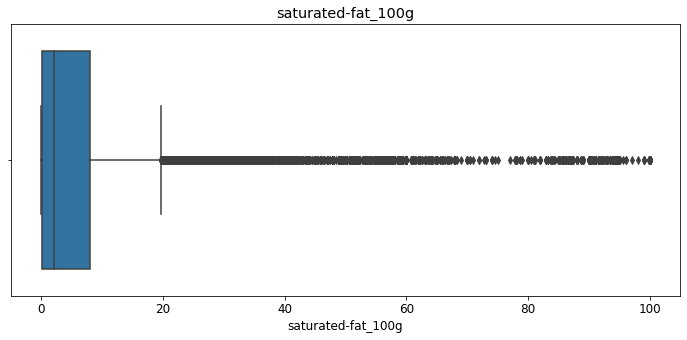

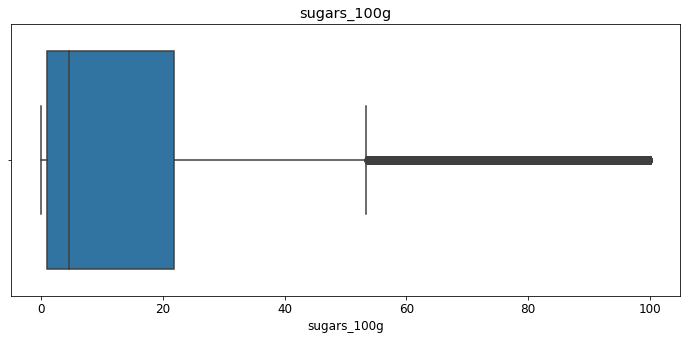

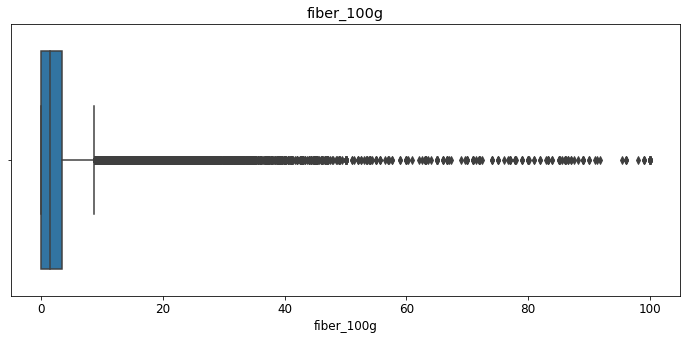

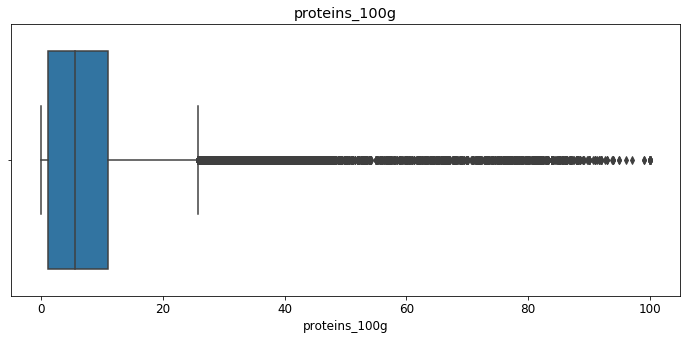

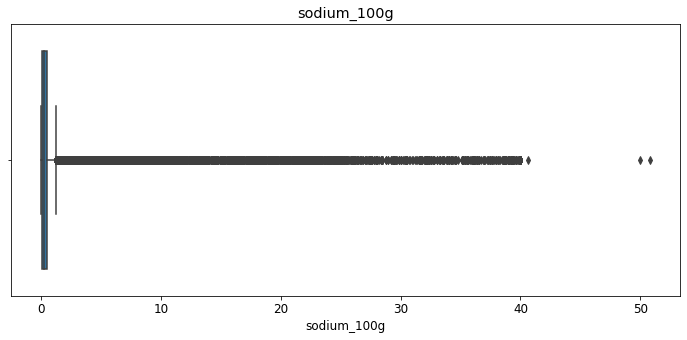

In [83]:
#Visually, we can see that we are dealing with a very large number of outliers
for i in nutrigrade_vars:
    fig, ax = plt.subplots(figsize = (12,5))
    sns.boxplot(i, data = data_clean)
    plt.title(i)
    plt.show()

In [84]:
for i in nutrigrade_vars:
    outliers(i)

saturated-fat_100g: 20.0
sugars_100g: 53.0
fiber_100g: 9.0
proteins_100g: 26.0
sodium_100g: 1.0


Any value above the above results (in grams) can be considered outliers and could feasibly be removed. Let's first see the impact that this would have on the amount of data that we will maintain.

In [85]:
#Fats
def del_outliers(column, cutoff):
    removed = round((len(data_clean[data_clean[column] > cutoff]) / len(data_clean))*100,1)
    data_clean.drop(data_clean[data_clean[column]>cutoff].index, inplace = True)
    print(f'{removed}% of data removed')

In [86]:
#Fats
del_outliers('saturated-fat_100g', 20)

4.8% of data removed


In [87]:
#Sugars
del_outliers('sugars_100g', 53)

6.9% of data removed


In [88]:
#Fiber
del_outliers('fiber_100g', 9)

2.7% of data removed


In [89]:
#Proteins
del_outliers('proteins_100g', 26)

3.2% of data removed


In [90]:
#Sodium
del_outliers('sodium_100g', 1)

7.6% of data removed


In [91]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367368 entries, 12 to 1131128
Data columns (total 53 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     367368 non-null  object 
 1   url                                      367368 non-null  object 
 2   creator                                  367367 non-null  object 
 3   created_t                                367368 non-null  int64  
 4   created_datetime                         367368 non-null  object 
 5   last_modified_t                          367368 non-null  int64  
 6   last_modified_datetime                   367368 non-null  object 
 7   product_name                             365126 non-null  object 
 8   quantity                                 183133 non-null  object 
 9   packaging                                135513 non-null  object 
 10  brands                        

In this step, we removed 108679 rows. We are now left with 367368 rows.

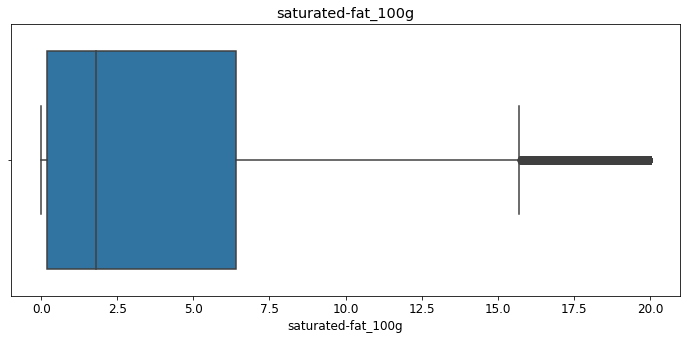

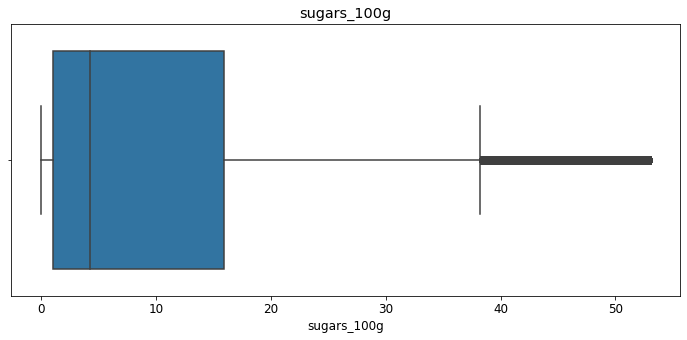

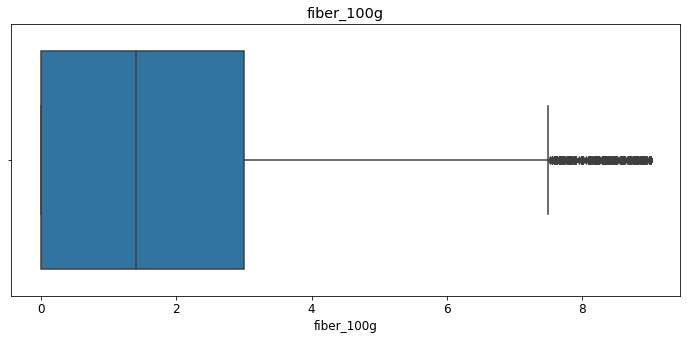

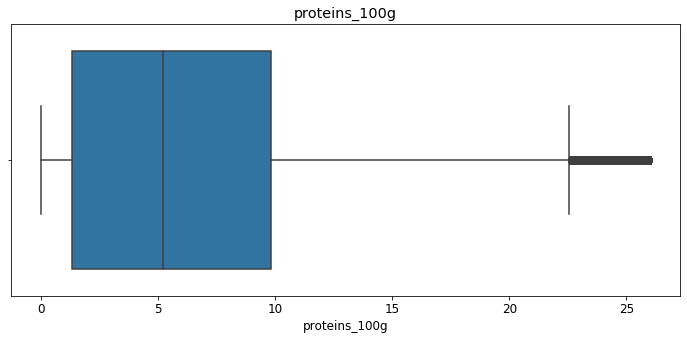

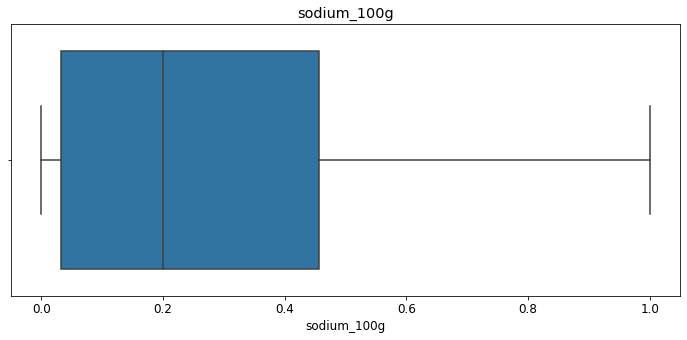

In [92]:
for i in nutrigrade_vars:
    fig, ax = plt.subplots(figsize = (12,5))
    sns.boxplot(i, data = data_clean)
    plt.title(i)
    plt.show()

### Energy Outliers

In [93]:
#Check to remove outliers using the IQR method

outliers('energy_100g')

energy_100g: 3408.0


In [94]:
#Remove outliers
del_outliers('energy_100g', 3408)

1.3% of data removed


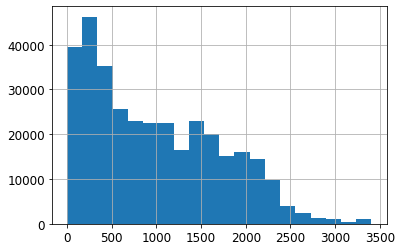

In [95]:
#Histo with outliers removed
data_clean['energy_100g'].hist(bins = 20);

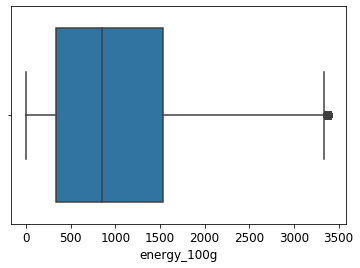

In [96]:
#Boxplot with values above 5,000 removed
sns.boxplot(x = data_clean['energy_100g']);

### Calories

In [97]:
#IQR Exercise for Calories
outliers('energy-kcal_100g')

energy-kcal_100g: 3362.0


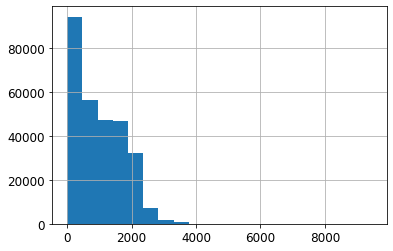

In [98]:
#Let's do a visual check before dropping data
data_clean['energy-kcal_100g'].hist(bins = 20)

In [99]:
del_outliers('energy-kcal_100g', 3362)

0.0% of data removed


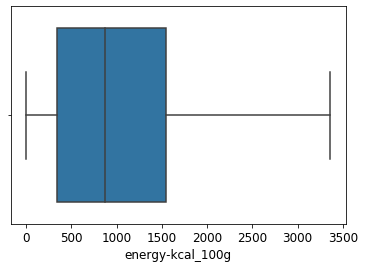

In [100]:
#Boxplot with outliers removed
sns.boxplot(x = data_clean['energy-kcal_100g']);

### Nutriscore

In [101]:
#The min value for the Nutriscore is -15 and the max is 40 (https://www.frc.ch/nutri-score-questions-reponses/)
#Overall, these boundaries are not violated, however, let us take a look within the categories
data_clean.pivot_table('nutrition-score-fr_100g', index = 'nutriscore_grade', aggfunc = max)

,nutrition-score-fr_100g
nutriscore_grade,
a,13.0
b,8.0
c,11.0
d,19.0
e,36.0


In [102]:
data_clean.pivot_table('nutrition-score-fr_100g', index = 'nutriscore_grade', aggfunc = min)

,nutrition-score-fr_100g
nutriscore_grade,
a,-15.0
b,-10.0
c,2.0
d,6.0
e,10.0


In [103]:
#Checking for all values in category A that are above 0 and that are NOT water as water is a special case and is always A
data_clean[(data_clean['nutriscore_grade']=='a') & (data_clean['nutrition-score-fr_100g']>0) & (data_clean['categories_en'].str.contains('Waters') == False)]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,brands,categories_en,origins,manufacturing_places,labels_en,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_en,ingredients_text,allergens,traces_en,serving_size,serving_quantity,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_en,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g


In [104]:
#Clean up B Liquids

#For all rows where nutrigrade is empty and nutriscore is filled out
for i, j in  data_clean[(data_clean['nutriscore_grade']=='b') & (data_clean['nutrition-score-fr_100g']>2) & (data_clean['quantity'].str.contains('l|L'))].iterrows():
    if j['nutrition-score-fr_100g'] <= 5:
        j['nutriscore_grade'] = 'c'
    elif j['nutrition-score-fr_100g'] <= 9:
        j['nutriscore_grade'] =  'd'
    else:
        j['nutriscore_grade'] =  'e'
    #Replace the empty value by the correct nutrigrade in the dataset
    data_clean['nutriscore_grade'][i] = j['nutriscore_grade']
    #Print the operations
    print(str(j['nutrition-score-fr_100g']) + ' converted to: ' + str(j['nutriscore_grade']))

3.0 converted to: c
3.0 converted to: c


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [105]:
#Clean up B Foods

#For all rows where nutrigrade is empty and nutriscore is filled out
for i, j in  data_clean[(data_clean['nutriscore_grade']=='b') & (data_clean['nutrition-score-fr_100g']>2)].iterrows():
    if j['nutrition-score-fr_100g'] <= 10:
        j['nutriscore_grade'] = 'c'
    elif j['nutrition-score-fr_100g'] <= 18:
        j['nutriscore_grade'] =  'd'
    else:
        j['nutriscore_grade'] =  'e'
    #Replace the empty value by the correct nutrigrade in the dataset
    data_clean['nutriscore_grade'][i] = j['nutriscore_grade']
    #Print the operations
    print(str(j['nutrition-score-fr_100g']) + ' converted to: ' + str(j['nutriscore_grade']))

3.0 converted to: c
6.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
6.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
6.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
8.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c
3.0 converted to: c


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [106]:
#Clean up B under 0 (both foods and liquids)

#For all rows where nutrigrade is empty and nutriscore is filled out
for i, j in  data_clean[(data_clean['nutriscore_grade']=='b') & (data_clean['nutrition-score-fr_100g']<0)].iterrows():
    j['nutriscore_grade'] =  'a'
    #Replace the empty value by the correct nutrigrade in the dataset
    data_clean['nutriscore_grade'][i] = j['nutriscore_grade']
    #Print the operations
    print(str(j['nutrition-score-fr_100g']) + ' converted to: ' + str(j['nutriscore_grade']))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


-4.0 converted to: a
-10.0 converted to: a
-2.0 converted to: a
-10.0 converted to: a
-3.0 converted to: a
-3.0 converted to: a
-3.0 converted to: a
-10.0 converted to: a
-10.0 converted to: a
-3.0 converted to: a
-3.0 converted to: a
-2.0 converted to: a
-3.0 converted to: a
-8.0 converted to: a
-3.0 converted to: a
-2.0 converted to: a
-3.0 converted to: a
-3.0 converted to: a
-3.0 converted to: a
-3.0 converted to: a
-1.0 converted to: a
-10.0 converted to: a
-2.0 converted to: a
-2.0 converted to: a
-3.0 converted to: a
-2.0 converted to: a
-3.0 converted to: a
-3.0 converted to: a
-2.0 converted to: a
-4.0 converted to: a
-2.0 converted to: a
-3.0 converted to: a
-2.0 converted to: a
-5.0 converted to: a
-3.0 converted to: a
-3.0 converted to: a
-2.0 converted to: a
-3.0 converted to: a
-2.0 converted to: a
-8.0 converted to: a
-4.0 converted to: a
-4.0 converted to: a
-5.0 converted to: a
-4.0 converted to: a
-2.0 converted to: a
-8.0 converted to: a
-10.0 converted to: a
-6.0 co

In [107]:
#Clean up C Foods

#For all rows where nutrigrade is empty and nutriscore is filled out
for i, j in  data_clean[(data_clean['nutriscore_grade']=='c') & (data_clean['nutrition-score-fr_100g']>10)].iterrows():
    if j['nutrition-score-fr_100g'] <= 10:
        j['nutriscore_grade'] = 'c'
    elif j['nutrition-score-fr_100g'] <= 18:
        j['nutriscore_grade'] =  'd'
    else:
        j['nutriscore_grade'] =  'e'
    #Replace the empty value by the correct nutrigrade in the dataset
    data_clean['nutriscore_grade'][i] = j['nutriscore_grade']
    #Print the operations
    print(str(j['nutrition-score-fr_100g']) + ' converted to: ' + str(j['nutriscore_grade']))

11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d
11.0 converted to: d


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [108]:
#Clean up D Foods

#For all rows where nutrigrade is empty and nutriscore is filled out
for i, j in  data_clean[(data_clean['nutriscore_grade']=='d') & (data_clean['nutrition-score-fr_100g']>18)].iterrows():
    if j['nutrition-score-fr_100g'] <= 10:
        j['nutriscore_grade'] = 'c'
    elif j['nutrition-score-fr_100g'] <= 18:
        j['nutriscore_grade'] =  'd'
    else:
        j['nutriscore_grade'] =  'e'
    #Replace the empty value by the correct nutrigrade in the dataset
    data_clean['nutriscore_grade'][i] = j['nutriscore_grade']
    #Print the operations
    print(str(j['nutrition-score-fr_100g']) + ' converted to: ' + str(j['nutriscore_grade']))

19.0 converted to: e
19.0 converted to: e
19.0 converted to: e
19.0 converted to: e
19.0 converted to: e


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [109]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362357 entries, 12 to 1131128
Data columns (total 53 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     362357 non-null  object 
 1   url                                      362357 non-null  object 
 2   creator                                  362356 non-null  object 
 3   created_t                                362357 non-null  int64  
 4   created_datetime                         362357 non-null  object 
 5   last_modified_t                          362357 non-null  int64  
 6   last_modified_datetime                   362357 non-null  object 
 7   product_name                             360144 non-null  object 
 8   quantity                                 181204 non-null  object 
 9   packaging                                134276 non-null  object 
 10  brands                        

With the removal of outliers, we are left with 361,338 rows

## Cleanup 5: Removing Duplicate Values

Remove all rows that have duplicate bar codes

In [110]:
#Checking whether we have the same number of unique codes as rows in the database
len(data_clean['code'].unique())

362341

In [111]:
#Removing pure duplicates
data_clean.drop_duplicates(inplace = True)

In [112]:
len(data_clean['code'])

362356

In [113]:
#We have less codes than the number of rows in the database, suggesting there are indeed duplicate values, we can identify them
dup_codes = data_clean['code'].value_counts().to_frame()

In [114]:
dup_codes.columns = ['count']

In [115]:
dup_codes = dup_codes[dup_codes['count'] > 1].index.tolist()

In [116]:
len(dup_codes)

15

In [117]:
dup_codes

['8850123125027',
 '20525002',
 '5425021250251',
 '3760009532427',
 '3263851538918',
 '0715826102998',
 '3280960641261',
 '3760031905053',
 '3436290002047',
 '3350033435445',
 '4300175485890',
 '3428420053203',
 '8718452146833',
 '010430652874676217',
 '3450970032995']

In [118]:
#Looking into a particular example
data_clean[data_clean['code'] == '3263851538918']

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,brands,categories_en,origins,manufacturing_places,labels_en,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_en,ingredients_text,allergens,traces_en,serving_size,serving_quantity,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states_en,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
452882,3263851538918,http://world-en.openfoodfacts.org/product/3263...,kiliweb,1526741118,2018-05-19T14:45:18Z,1542735407,2018-11-20T17:36:47Z,Pointes d'asperges,NaN,NaN,NaN,"Plant-based foods and beverages,Plant-based fo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,a,NaN,Fruits and vegetables,Vegetables,"To be completed,Nutrition facts completed,Ingr...",Plant-based foods and beverages,NaN,67.0,0.0,0.0,NaN,NaN,1.6,1.2,NaN,1.7,0.9,0.354331,NaN,NaN,NaN,NaN,-3.0
452883,3263851538918,http://world-en.openfoodfacts.org/product/3263...,kiliweb,1526741118,2018-05-19T14:45:18Z,1547756145,2019-01-17T20:15:45Z,Pointes d'asperges pelées main,190 g,"Bocal,Verre",Leader Price,"Plant-based foods and beverages,Plant-based fo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Leader Price,France,"Asperges blanches, eau, sel, acidifiant : acid...",NaN,NaN,NaN,NaN,1.0,E330 - Citric acid,0.0,0.0,a,3.0,Fruits and vegetables,Vegetables,"To be completed,Nutrition facts completed,Ingr...",Plant-based foods and beverages,67.0,67.0,0.0,0.0,NaN,NaN,1.6,1.2,NaN,1.7,0.9,0.360000,NaN,NaN,NaN,NaN,-3.0


We notice that the last modified datetime is different and that the more recent entry is filled out more completely.

In [119]:
#Sort the dataset by last modified date and keep only the newest record for duplicate codes
data_clean = data_clean.sort_values('last_modified_t', ascending = False)
data_clean.drop_duplicates(subset = 'code', keep ='first', inplace = True)

In [120]:
#Function for the above in case we would want to use it again
def drop_old_dup(df):
    df = df.sort_values('last_modified_t', ascending = False)
    df.drop_duplicates(subset = 'code', keep ='first', inplace = True)

In [121]:
#Checking that there are no more duplicates on code
len(data_clean) - len(data_clean['code'].unique())

0

In [122]:
len(data_clean)

362341

Through this cleanup, we have removed 15 rows

## Cleanup 6: Checking for Lexical Errors

### PNNS Groups 1

In [123]:
#Checking categories of field pnns_groups_1 to make sure they are grouped properly
data_clean['pnns_groups_1'].value_counts()

unknown                    121953
Sugary snacks               35302
Milk and dairy products     34053
Fish Meat Eggs              31680
Cereals and potatoes        29782
Beverages                   26044
Composite foods             25837
Fruits and vegetables       19976
Fat and sauces              13938
Salty snacks                13104
sugary-snacks                3301
fruits-and-vegetables        2574
cereals-and-potatoes           42
salty-snacks                    3
Name: pnns_groups_1, dtype: int64

In [124]:
#Replace Sugary Snacks
data_clean['pnns_groups_1'].replace('sugary-snacks', 'Sugary snacks', inplace = True)

In [125]:
#Replace Fruits and Vegetables
data_clean['pnns_groups_1'].replace('fruits-and-vegetables', 'Fruits and vegetables', inplace = True)

In [126]:
#Replace Cereals and Potatoes
data_clean['pnns_groups_1'].replace('cereals-and-potatoes', 'Cereals and potatoes', inplace = True)

In [127]:
#Replace Salty Snacks
data_clean['pnns_groups_1'].replace('salty-snacks', 'Salty snacks', inplace = True)

In [128]:
data_clean['pnns_groups_1'].value_counts()

unknown                    121953
Sugary snacks               38603
Milk and dairy products     34053
Fish Meat Eggs              31680
Cereals and potatoes        29824
Beverages                   26044
Composite foods             25837
Fruits and vegetables       22550
Fat and sauces              13938
Salty snacks                13107
Name: pnns_groups_1, dtype: int64

### PNNS Groups 2

In [129]:
#Checking categories of field pnns_groups_2 to make sure they are grouped properly
data_clean['pnns_groups_2'].value_counts()

unknown                             121953
Biscuits and cakes                   23497
One-dish meals                       20726
Milk and yogurt                      15565
Cereals                              12860
Processed meat                       12833
Dressings and sauces                 12490
Cheese                               10278
Meat                                  8841
Sweets                                8752
Fish and seafood                      8571
Fruits                                8530
Vegetables                            8261
Bread                                 7764
Sweetened beverages                   7278
Appetizers                            6852
Fruit juices                          5746
Ice cream                             4362
Alcoholic beverages                   4308
Breakfast cereals                     4113
Dairy desserts                        3848
Unsweetened beverages                 3635
Legumes                               3367
pastries   

In [130]:
#Replace Nuts
data_clean['pnns_groups_2'].replace('nuts', 'Nuts', inplace = True)

In [131]:
#Replace Legumes
data_clean['pnns_groups_2'].replace('legumes', 'Legumes', inplace = True)

In [132]:
#Replace Cereals
data_clean['pnns_groups_2'].replace('cereals', 'Cereals', inplace = True)

In [133]:
#Replace Fruits
data_clean['pnns_groups_2'].replace('fruits', 'Fruits', inplace = True)

In [134]:
#Replace Pizza pies and quiche
data_clean['pnns_groups_2'].replace('Pizza pies and quiches', 'Pizza pies and quiche', inplace = True)

In [135]:
#Replace Vegetables
data_clean['pnns_groups_2'].replace('vegetables', 'Vegetables', inplace = True)

In [136]:
data_clean['pnns_groups_2'].value_counts()

unknown                             121953
Biscuits and cakes                   23497
One-dish meals                       20726
Milk and yogurt                      15565
Cereals                              12892
Processed meat                       12833
Dressings and sauces                 12490
Vegetables                           10617
Cheese                               10278
Meat                                  8841
Sweets                                8752
Fruits                                8748
Fish and seafood                      8571
Bread                                 7764
Sweetened beverages                   7278
Appetizers                            6852
Fruit juices                          5746
Ice cream                             4362
Alcoholic beverages                   4308
Breakfast cereals                     4113
Dairy desserts                        3848
Unsweetened beverages                 3635
Pizza pies and quiche                 3591
Legumes    

In [137]:
#Last check to make sure no columns were left out
for i in data_clean['pnns_groups_2'].unique():
    for j in data_clean['pnns_groups_2'].unique():
        similarity = fuzz.ratio(i,j)
        if similarity >=80 and similarity !=100:
            print(f'{i} to {j}: {similarity}%')

Sweetened beverages to Unsweetened beverages: 90%
Unsweetened beverages to Sweetened beverages: 90%


## Cleanup 7: Converting values to appropriate data type

In [138]:
#Column Nova Group is problematic as it is a variable made up of 4 variables but is currently interpreted as a flat. 
#We can fix this by replacing the values.

for i in data_clean['nova_group'].unique():
    data_clean['nova_group'].replace(i, f'Group {i}', inplace = True)

In [139]:
#Replace 'Group nan' values created above by NaN values
data_clean['nova_group'].replace('Group nan', np.NaN, inplace = True)

In [140]:
#Write final file to CSV
data_clean.to_csv('openfoodfacts_cleaned_20200228.csv')

In [141]:
#Summary of cleanup
print(f'From {len(data)} rows on {len(data.columns)} columns to {len(data_clean)} rows on {len(data_clean.columns)} columns.')

From 1131131 rows on 178 columns to 362341 rows on 53 columns.
